# K-means from scratch

* Cluster unlabeled data


In [218]:
using PyPlot

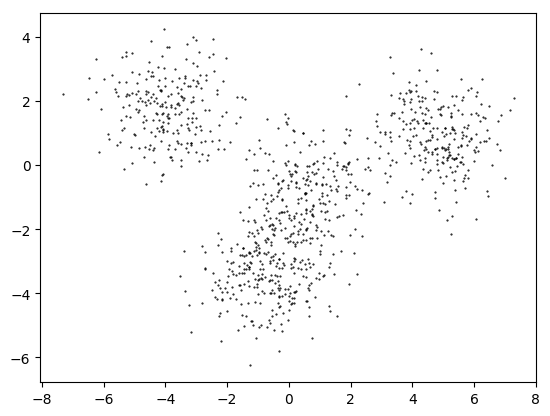

2×1000 Array{Float64,2}:
 -0.238954  -2.81391  5.79397   0.200144  …  0.143204  5.91416  5.53676 
 -4.96322    2.02804  1.2531   -2.92428      1.0862    1.59531  0.095083

In [219]:
# number of data points
N = 1000
# number of dimensins
n = 2
# generate random data
srand(1234)
x = randn(n,N)
nc = 4
xc_true = 3 * randn(n,nc)

for i = 1:N
    ic = rand(1:nc)
    x[:,i] = xc_true[:,ic] + randn(2)
end

plot(x[1,:],x[2,:],"k.",markersize = 1)
x

Let's try to find the centroid of the k clusters. Here k is 4 

In [220]:
k = 4

4

 Pick $k$ random elements of $x$ as initial centroids. This is the Forgy method for initialization.

In [221]:
xc = x[:,rand(1:N,k)]

2×4 Array{Float64,2}:
 1.55109   -1.45972   0.626195  -1.15342 
 0.107881  -3.70148  -3.82496   -0.554834

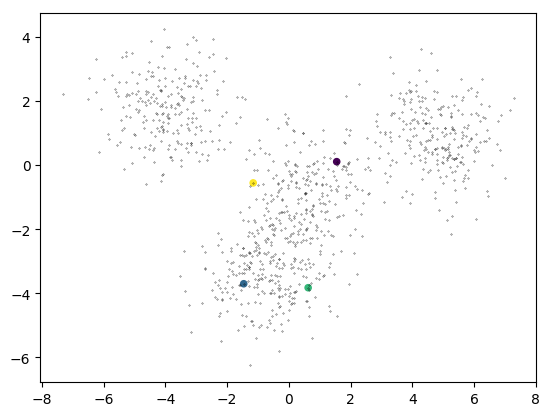

PyObject <matplotlib.collections.PathCollection object at 0x7fee39d1ce90>

In [222]:
plot(x[1,:],x[2,:],"k.",markersize=0.5)
scatter(xc[1,:],xc[2,:],20,1:k)


We are just using the Euclidian distance here

In [223]:
distance(x,y) = sum((x-y).^2)

distance (generic function with 1 method)

To each data point $x_i$ (`x[:,i]`) assign the label correspond to the closest centroid.

In [224]:
label = zeros(Int,N)

function assignlabel!(x,xc,distance,label)
    N = size(x,2)
    k = size(xc,2)
    for i = 1:N
      mindist = 1e10
      for j = 1:k
        dist = distance(x[:,i],xc[:,j])
        if dist < mindist
           label[i] = j
           mindist = dist
        end
      end
    end
end
assignlabel!(x,xc,distance,label)

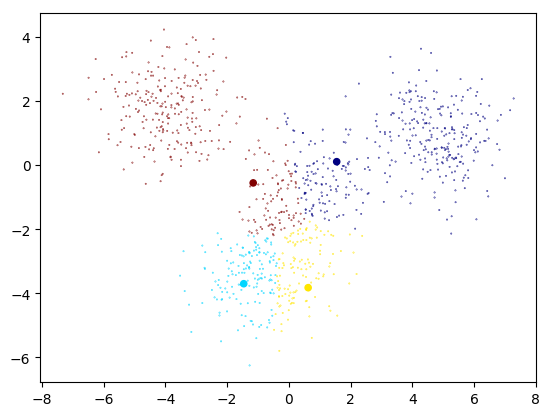

PyObject <matplotlib.collections.PathCollection object at 0x7fee39c23cd0>

In [225]:
function plotcluster(x,label,xc)
    k = size(xc,2)
    scatter(xc[1,:],xc[2,:],20,1:k; cmap = "jet")
    scatter(x[1,:],x[2,:],0.1,label; cmap = "jet")
end
plotcluster(x,label,xc)

Update the centroids `xcnew` based on the labels

In [226]:
function updatemeans!(x,label,xcnew)
  k = size(xcnew,2)

  for j = 1:k;
    xcnew[:,j] = mean(x[:,label .== j],2)
  end
end

xcnew = similar(xc)
updatemeans!(x,label,xcnew)
xcnew

2×4 Array{Float64,2}:
 3.58948   -1.40562   0.438302  -2.90465
 0.476353  -3.49479  -3.29097    0.93377

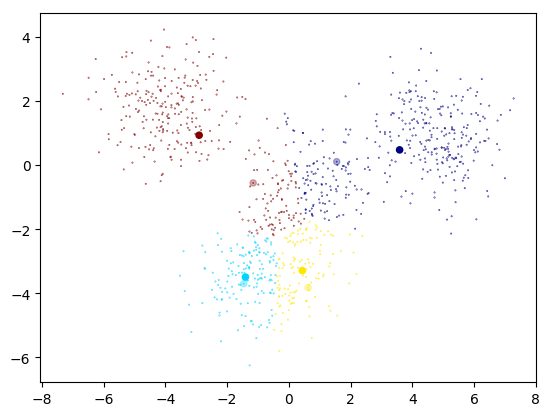

PyObject <matplotlib.collections.PathCollection object at 0x7fee39dd01d0>

In [227]:
plotcluster(x,label,xcnew)
scatter(xc[1,:],xc[2,:],20,1:k; cmap = "jet", alpha = 0.3)

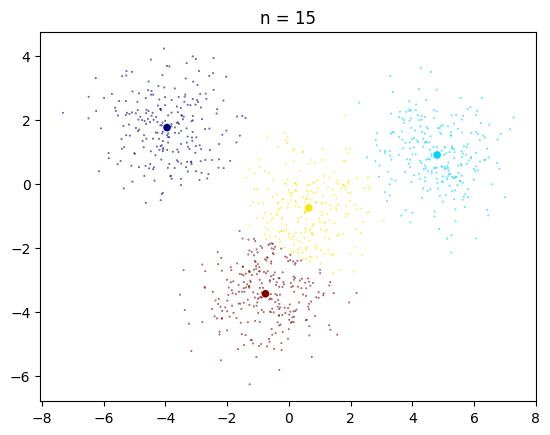

INFO: Converged


In [229]:
xc = x[:,rand(1:N,k)]
nmaxiter = 100
newlabel = zeros(Int,N)
fig = figure()
for n = 1:nmaxiter
    assignlabel!(x,xc,distance,newlabel)
    updatemeans!(x,newlabel,xcnew)
 
    xc .= xcnew
    plotcluster(x,newlabel,xcnew)
    title("n = $(n)")
    sleep(1)
    IJulia.clear_output(true)
    display(fig)
    clf()
    
    if label == newlabel
        info("Converged")
        break
    end
    label .= newlabel     
end



Note how sometimes the algorithm does not converge

In [231]:
xc

2×4 Array{Float64,2}:
 -3.94462  4.80477    0.646769  -0.754602
  1.76655  0.912755  -0.744018  -3.42157 

In [233]:
xc_true

2×4 Array{Float64,2}:
 -3.91166   0.526458  -0.789345  4.7484  
  1.76087  -0.828008  -3.40463   0.877456

Note the connection to the [Voroni diagram](https://en.wikipedia.org/wiki/Voronoi_diagram)
